# Contents
1. Question 1-Importing libraries and data frames
2. Question 2-Checking PII data.
3. Question 3-Creating geographic_regions.
4. Question 4-Creating exclusion flag and subsetting.
5. Question 5-Data Profiling
6. Question 6-Distribution of Data Profiles.
7. Question 7-Aggregation of Data Profiles.
8. Question 8-Crosstabs.
9. Question 9-Saving charts produced.

# Question 1

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Owner\OneDrive\Desktop\Data Analytics\Achievement 4\11-2022 Instacart Basket Analysis'

In [3]:
ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_cust_merged.pkl'))

# Question 2

In [4]:
ords_prods_cust_merge.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,First Name,Last Name,Gender,State,Age,date_joined,family_status,income,_merge
0,0,2539329,1,1,2,8,NaN,196,1,0,...,non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,married,40423,both
1,1,2398795,1,2,3,7,15.0,196,1,1,...,non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,married,40423,both
2,2,473747,1,3,3,12,21.0,196,1,1,...,non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,married,40423,both
3,3,2254736,1,4,4,7,29.0,196,1,1,...,non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,married,40423,both
4,4,431534,1,5,4,15,28.0,196,1,1,...,non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,married,40423,both


Markup Answer

In reference to PII data, we need to not use the columns first name or last name. This could link the data to Instacart customers personal information. The rest of the data is OK to use as there is no personal link to the customers that would tell us who it was for.

# Question 3

In [5]:
geographic_areas = []

for value in ords_prods_cust_merge["State"]:
    if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut':
        geographic_areas.append("New England")
    elif value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
        geographic_areas.append("Middle Atlantic")
    elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio':
        geographic_areas.append("East North Central")
    elif value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
        geographic_areas.append("West North Central")
    elif value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida':
        geographic_areas.append("South Atlantic")
    elif value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama':
        geographic_areas.append("East South Central")
    elif value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana':
        geographic_areas.append("West South Central")
    elif value == 'Idaho' or value == 'Montana' or value == 'Wyoming' or value == 'Nevada' or value == 'Utah' or value == 'Colorado' or value == 'Arizona' or value == 'New Mexico':
        geographic_areas.append("Mountain")
    else:
        geographic_areas.append("Pacific")

In [6]:
geographic_areas

['East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East South Central',
 'East Sout

In [7]:
#Create a column for geographic_areas
ords_prods_cust_merge['geographic_regions'] = geographic_areas

In [8]:
pd.crosstab(ords_prods_cust_merge.geographic_regions, ords_prods_cust_merge.spending_flag)

spending_flag,High spender,Low spender
geographic_regions,,
East North Central,3144020,3641
East South Central,2518145,2896
Middle Atlantic,1929224,1533
Mountain,5077357,5100
New England,3787905,4074
Pacific,3207076,3380
South Atlantic,5700082,5003
West North Central,4445514,4150
West South Central,2563646,2113


# Question 4

In [9]:
#Creating exclusion flag for order numbers less than 5
ords_prods_cust_merge.loc[ords_prods_cust_merge['order_number'] < 5, 'exclusion_flag'] = 'low_activity'

In [10]:
ords_prods_cust_merge.loc[ords_prods_cust_merge['order_number'] > 5, 'exclusion_flag'] = 'high_activity'

Didn't mean to markdown here. :)

In [11]:
#Subsetting to remove 'low_activity' records
df_high_activity = ords_prods_cust_merge[ords_prods_cust_merge['exclusion_flag']=='high_activity']

In [12]:
df_high_activity.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Last Name,Gender,State,Age,date_joined,family_status,income,_merge,geographic_regions,exclusion_flag
5,5,3367565,1,6,2,7,19.0,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,married,40423,both,East South Central,high_activity
6,6,550135,1,7,1,9,20.0,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,married,40423,both,East South Central,high_activity
7,7,3108588,1,8,1,14,14.0,196,2,1,...,Nguyen,Female,Alabama,31,2/17/2019,married,40423,both,East South Central,high_activity
8,8,2295261,1,9,1,16,0.0,196,4,1,...,Nguyen,Female,Alabama,31,2/17/2019,married,40423,both,East South Central,high_activity
9,9,2550362,1,10,4,8,30.0,196,1,1,...,Nguyen,Female,Alabama,31,2/17/2019,married,40423,both,East South Central,high_activity


In [13]:
df_high_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity.pkl'))

# Question 5

In [14]:
#Data profiling by Age column

age_profile = []

for value in ords_prods_cust_merge["Age"]:
    if value <= 21:
        age_profile.append("young customer")
    elif value > 21 and value < 50:
        age_profile.append("middle-aged customer")
    else:
        age_profile.append("older customer")

In [15]:
age_profile

['middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',
 'middle-aged customer',


In [16]:
#Data profiling by income column

income_profile = []

for value in ords_prods_cust_merge["income"]:
    if value <= 40000:
        income_profile.append("lower income")
    elif value > 40000 and value < 80000:
        income_profile.append("middle income")
    else:
        income_profile.append("high income")

In [17]:
income_profile

['middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle income',
 'middle i

In [18]:
ords_prods_cust_merge['department_id'].value_counts(dropna = False)

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

In [31]:
#Data profiling by department_id column

department_profile = []

for value in ords_prods_cust_merge["department_id"]:
    if value == 4 or value == 16 or value == 19 or value == 7 or value == 1 or value == 13 or value == 3:
        department_profile.append("high demand")
    elif value == 15 or value == 20 or value == 9 or value == 17 or value == 12 or value == 14 or value == 11 or value == 18:
        department_profile.append("medium demand")
    else:
        department_profile.append("low demand")

In [32]:
department_profile

['high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'medium demand',
 'medium demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'medium demand',
 'medium demand',
 'medium demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand',
 'high demand'

In [33]:
#create a column with age_profile
ords_prods_cust_merge['age_profile'] = age_profile

In [35]:
#create a column with income_profile
ords_prods_cust_merge['income_profile'] = income_profile

In [36]:
#create a column with department_profile
ords_prods_cust_merge['department_profile'] = department_profile

In [37]:
ords_prods_cust_merge.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Age,date_joined,family_status,income,_merge,geographic_regions,exclusion_flag,age_profile,income_profile,department_profile
0,0,2539329,1,1,2,8,NaN,196,1,0,...,31,2/17/2019,married,40423,both,East South Central,low_activity,middle-aged customer,middle income,high demand
1,1,2398795,1,2,3,7,15.0,196,1,1,...,31,2/17/2019,married,40423,both,East South Central,low_activity,middle-aged customer,middle income,high demand
2,2,473747,1,3,3,12,21.0,196,1,1,...,31,2/17/2019,married,40423,both,East South Central,low_activity,middle-aged customer,middle income,high demand
3,3,2254736,1,4,4,7,29.0,196,1,1,...,31,2/17/2019,married,40423,both,East South Central,low_activity,middle-aged customer,middle income,high demand
4,4,431534,1,5,4,15,28.0,196,1,1,...,31,2/17/2019,married,40423,both,East South Central,NaN,middle-aged customer,middle income,high demand


# Question 6

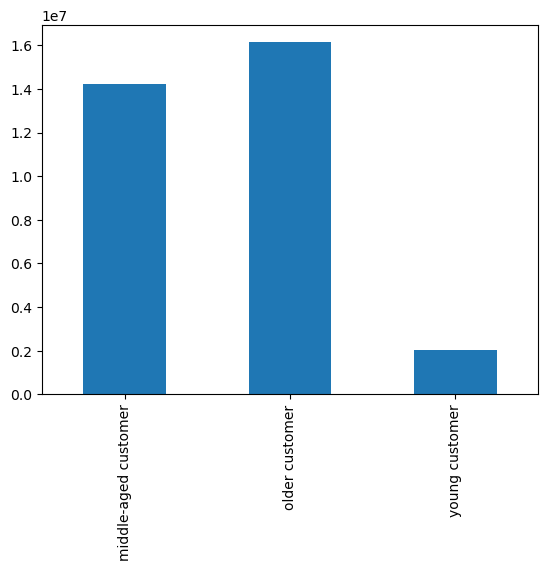

In [52]:
#Creating bar charts to show distribution of profiles
bar1 = ords_prods_cust_merge['age_profile'].value_counts().sort_index().plot.bar()

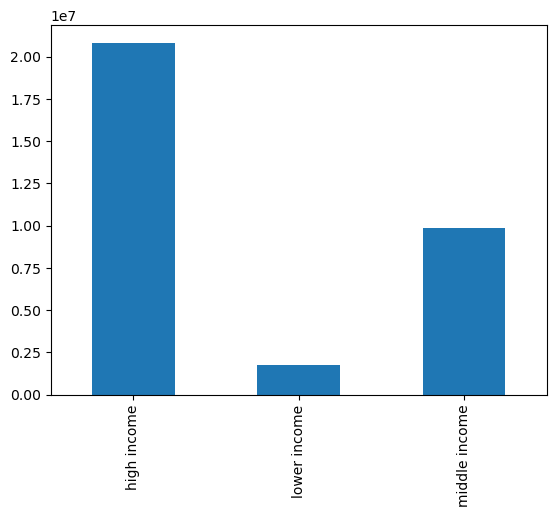

In [53]:
bar2 = ords_prods_cust_merge['income_profile'].value_counts().sort_index().plot.bar()

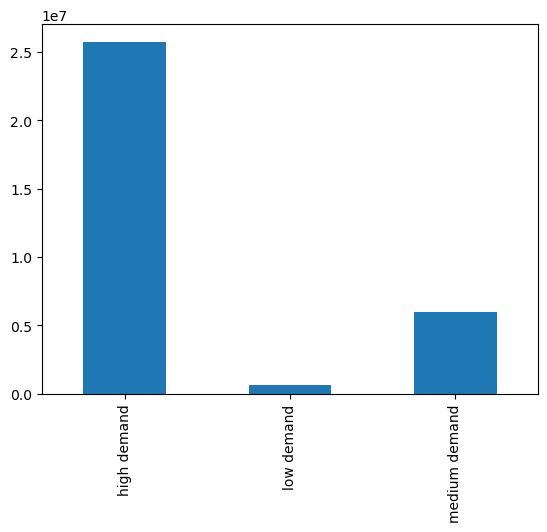

In [54]:
bar3 = ords_prods_cust_merge['department_profile'].value_counts().sort_index().plot.bar()

# Question 7

In [43]:
#Aggregation of age_profile
ords_prods_cust_merge.groupby(['age_profile']).agg({'prices': ['mean', 'max', 'min']})

prices              
                           mean      max  min
age_profile                                  
middle-aged customer  12.192387  99999.0  1.0
older customer        11.794544  99999.0  1.0
young customer        11.967729  99999.0  1.0

In [44]:
ords_prods_cust_merge.groupby(['age_profile']).agg({'days_since_prior_order': ['mean', 'max', 'min']})

days_since_prior_order           
                                       mean   max  min
age_profile                                           
middle-aged customer              11.102494  30.0  0.0
older customer                    11.103497  30.0  0.0
young customer                    11.119800  30.0  0.0

In [45]:
#Aggregation or income_profile
ords_prods_cust_merge.groupby(['income_profile']).agg({'prices': ['mean', 'max', 'min']})

prices              
                     mean      max  min
income_profile                         
high income     14.473231  99999.0  1.0
lower income     6.495264     25.0  1.0
middle income    7.668248  14900.0  1.0

In [46]:
ords_prods_cust_merge.groupby(['income_profile']).agg({'days_since_prior_order': ['mean', 'max', 'min']})

days_since_prior_order           
                                 mean   max  min
income_profile                                  
high income                 11.045033  30.0  0.0
lower income                11.686944  30.0  0.0
middle income               11.128019  30.0  0.0

In [47]:
#Aggregation of department_profile
ords_prods_cust_merge.groupby(['department_profile']).agg({'prices': ['mean', 'max', 'min']})

prices              
                         mean      max  min
department_profile                         
high demand         12.858051  99999.0  1.0
low demand           7.919514     15.0  1.0
medium demand        8.666420     25.0  1.0

In [48]:
ords_prods_cust_merge.groupby(['department_profile']).agg({'days_since_prior_order': ['mean', 'max', 'min']})

days_since_prior_order           
                                     mean   max  min
department_profile                                  
high demand                     11.022969  30.0  0.0
low demand                      10.960598  30.0  0.0
medium demand                   11.468868  30.0  0.0

# Question 8

In [49]:
#Crossing income_profile with geographic regions
pd.crosstab(ords_prods_cust_merge.income_profile, ords_prods_cust_merge.geographic_regions)

geographic_regions,East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central
income_profile,,,,,,,,,
high income,2029688,1599986,1249326,3252709,2466016,2054875,3671089,2883602,1623769
lower income,163585,140450,96707,261029,206672,171413,311393,237455,138494
middle income,954388,780605,584724,1568719,1119291,984168,1722603,1328607,803496


In [50]:
#Crossing age_profile with geographic regions
pd.crosstab(ords_prods_cust_merge.age_profile, ords_prods_cust_merge.geographic_regions)

geographic_regions,East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central
age_profile,,,,,,,,,
middle-aged customer,1383225,1100180,839805,2245787,1662964,1378364,2516264,1976476,1134909
older customer,1568530,1254853,965918,2535744,1897256,1624240,2823726,2200604,1260559
young customer,195906,166008,125034,300926,231759,207852,365095,272584,170291


# Question 9

In [55]:
#Saving charts produced
bar1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_profile.png'))

In [56]:
bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_profile.png'))

In [57]:
bar3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_profile.png'))

In [58]:
#Storing dataframe to pickle
ords_prods_cust_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_cust_merged_profiles.pkl'))